In [8]:
from statistics import mean
import numpy as np
import matplotlib.pyplot as plt
import random

In [30]:
def generate_random_dataset(hm,variance,step=2,correlation=False): # to test if the model is the best one
    val = 1 #starting value
    ys=[]
    xs=[]
    for i in range(hm):
        y= val + random.randrange(-variance,variance)
        ys.append(y)
        xs.append(i)
        if correlation and correlation == 'pos':
            val +=step
        elif correlation and correlation == 'neg':
            val -=step
    return np.array(xs,dtype=np.float64), np.array(ys,dtype=np.float64)

In [31]:
def best_fit_slope_and_intercept(xs,ys):
    m = (mean(xs)*mean(ys)-mean(xs*ys))/(mean(xs)**2 - mean(xs**2))
    b = mean(ys)-m*mean(xs)
    return b,m



In [32]:
def squared_error(ys,line):
    s = sum((ys-line)**2)
    return s

In [33]:
def r_squared_error(ys,line):
    y_mean_line=[]
    for y in ys:
        y_mean_line.append(mean(ys))
    squared_err_reg= squared_error(ys,line)
    squared_err_mean= squared_error(ys,y_mean_line)
    r = 1 - squared_err_reg/squared_err_mean
    return r

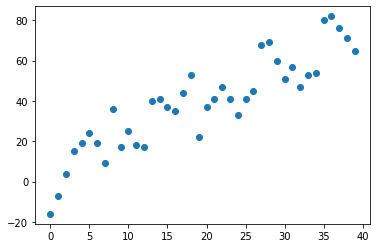

In [55]:
#xs = np.array([1,2,3,4,5,6],dtype=np.float64)
#ys = np.array([5,4,6,5,6,7],dtype=np.float64)
xs,ys = generate_random_dataset(40,20,2,'pos')
plt.scatter(xs,ys)
plt.show()


In [56]:
b, m= best_fit_slope_and_intercept(xs,ys)
print(m)
print(b)

1.7789868667917446
4.559756097560978


[4.559756097560978, 6.338742964352723, 8.117729831144468, 9.896716697936212, 11.675703564727957, 13.454690431519701, 15.233677298311445, 17.01266416510319, 18.791651031894936, 20.57063789868668, 22.349624765478424, 24.128611632270168, 25.907598499061912, 27.686585365853656, 29.465572232645403, 31.244559099437147, 33.023545966228895, 34.802532833020635, 36.58151969981238, 38.36050656660412, 40.13949343339587, 41.91848030018761, 43.69746716697936, 45.476454033771105, 47.255440900562846, 49.03442776735459, 50.81341463414633, 52.59240150093808, 54.37138836772983, 56.15037523452157, 57.929362101313316, 59.70834896810506, 61.487335834896804, 63.26632270168855, 65.04530956848029, 66.82429643527203, 68.60328330206379, 70.38227016885553, 72.16125703564727, 73.94024390243902]


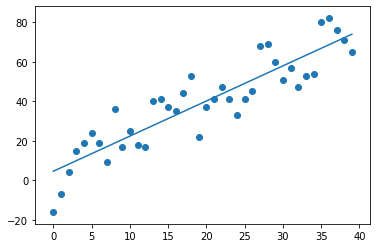

In [57]:
line=[]
for x in xs :
    line.append(m*x+b)
print(line)
plt.plot(xs,line)
plt.scatter(xs,ys)
plt.show()

In [58]:
predict_x=8
predict_y = m*predict_x+b
print(predict_y)

18.791651031894936


In [59]:
r = r_squared_error(ys,line)
print(r)

0.8071175612296622


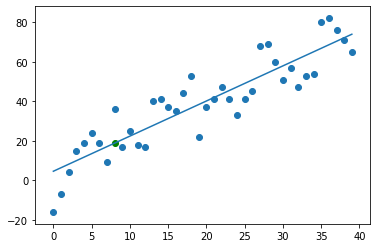

In [60]:
plt.plot(xs,line)
plt.scatter(xs,ys)
plt.scatter(predict_x,predict_y,c='g')
plt.show()